In [1]:
%matplotlib inline
import sys, re
import numpy as np
import pandas as pd
import csv
from matplotlib import pyplot as plt
pd.options.display.max_rows = 4000
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from bs4 import BeautifulSoup
import string
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from os import path
from wordcloud import WordCloud, ImageColorGenerator
from collections import Counter
import unicodedata
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder,TrigramCollocationFinder, TrigramAssocMeasures
from operator import itemgetter
nltk.download('punkt')
from sklearn import preprocessing

[nltk_data] Downloading package stopwords to C:\Users\Vishaal
[nltk_data]     Bhardwaj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Vishaal
[nltk_data]     Bhardwaj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Vishaal
[nltk_data]     Bhardwaj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
pd.options.display.max_rows = 4000
#Mac
#survey_data = pd.read_csv(r'/Volumes/GoogleDrive/Shared drives/MediSprout/data/survey_data.csv')
#PC
survey_data = pd.read_csv(r'G:\Shared drives\MediSprout\vishaal\MediSprout-notebooks\NLP Analysis\survey_data.csv')
survey_data

,id,source,visit_id,is_satisfied,rating,feedback,member_healthcare_org_rel_id,patient_id,created_on,updated_on,is_mobile,platform,client_name,client_version,screen_size,connection_type,build_version,n_minute_duration
0,1,Clinician,17486,1,NaN,NaN,676,647.0,2019-03-19 17:56:05,2019-03-19 17:56:05,0,NaN,NaN,NaN,NaN,NaN,NaN,1.6667
1,2,Clinician,17488,1,NaN,NaN,322,389.0,2019-03-20 17:35:56,2019-03-20 17:35:56,0,NaN,NaN,NaN,NaN,NaN,NaN,22.7667
2,3,Patient,17488,1,NaN,NaN,322,389.0,2019-03-20 17:35:57,2019-03-20 17:35:57,0,NaN,NaN,NaN,NaN,NaN,NaN,22.7667
3,4,Patient,17490,0,NaN,NaN,237,87.0,2019-03-20 18:21:10,2019-03-20 18:21:10,0,NaN,NaN,NaN,NaN,NaN,NaN,52.0500
4,5,Clinician,17490,0,NaN,shut down mid session,237,87.0,2019-03-20 18:21:38,2019-03-20 18:21:38,0,NaN,NaN,NaN,NaN,NaN,NaN,52.0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161900,161901,Clinician,269699,1,3.0,Poor audio and visual most of the session.,67569,108227.0,2020-10-07 23:02:03,2020-10-07 23:02:03,1,,NaN,NaN,NaN,NaN,NaN,59.0500
161901,161902,Patient,269711,1,5.0,NaN,4179,15992.0,2020-10-07 23:05:31,2020-10-07 23:05:31,1,,NaN,NaN,NaN,NaN,NaN,22.9667
161902,161903,Patient,269510,0,5.0,NaN,60228,47688.0,2020-10-07 23:19:02,2020-10-07 23:19:02,0,Mac OS X 10_15_6,Chrome,85.0.4183.121,1440 x 900,NaN,NaN,44.6167
161903,161904,Patient,267236,1,5.0,NaN,65974,190019.0,2020-10-07 23:20:22,2020-10-07 23:20:22,1,,NaN,NaN,NaN,NaN,NaN,4.8500


In [3]:
survey_data.loc[survey_data['rating'] == '1024 x 1024']

D:\New folder\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,id,source,visit_id,is_satisfied,rating,feedback,member_healthcare_org_rel_id,patient_id,created_on,updated_on,is_mobile,platform,client_name,client_version,screen_size,connection_type,build_version,n_minute_duration


In [4]:
survey_data['rating'].dropna().astype(int)

103622    5
103640    5
103642    5
103653    4
103656    4
         ..
161900    3
161901    5
161902    5
161903    5
161904    5
Name: rating, Length: 33412, dtype: int32

In [5]:
survey_data.loc[survey_data['rating'] != int]

,id,source,visit_id,is_satisfied,rating,feedback,member_healthcare_org_rel_id,patient_id,created_on,updated_on,is_mobile,platform,client_name,client_version,screen_size,connection_type,build_version,n_minute_duration
0,1,Clinician,17486,1,NaN,NaN,676,647.0,2019-03-19 17:56:05,2019-03-19 17:56:05,0,NaN,NaN,NaN,NaN,NaN,NaN,1.6667
1,2,Clinician,17488,1,NaN,NaN,322,389.0,2019-03-20 17:35:56,2019-03-20 17:35:56,0,NaN,NaN,NaN,NaN,NaN,NaN,22.7667
2,3,Patient,17488,1,NaN,NaN,322,389.0,2019-03-20 17:35:57,2019-03-20 17:35:57,0,NaN,NaN,NaN,NaN,NaN,NaN,22.7667
3,4,Patient,17490,0,NaN,NaN,237,87.0,2019-03-20 18:21:10,2019-03-20 18:21:10,0,NaN,NaN,NaN,NaN,NaN,NaN,52.0500
4,5,Clinician,17490,0,NaN,shut down mid session,237,87.0,2019-03-20 18:21:38,2019-03-20 18:21:38,0,NaN,NaN,NaN,NaN,NaN,NaN,52.0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161900,161901,Clinician,269699,1,3.0,Poor audio and visual most of the session.,67569,108227.0,2020-10-07 23:02:03,2020-10-07 23:02:03,1,,NaN,NaN,NaN,NaN,NaN,59.0500
161901,161902,Patient,269711,1,5.0,NaN,4179,15992.0,2020-10-07 23:05:31,2020-10-07 23:05:31,1,,NaN,NaN,NaN,NaN,NaN,22.9667
161902,161903,Patient,269510,0,5.0,NaN,60228,47688.0,2020-10-07 23:19:02,2020-10-07 23:19:02,0,Mac OS X 10_15_6,Chrome,85.0.4183.121,1440 x 900,NaN,NaN,44.6167
161903,161904,Patient,267236,1,5.0,NaN,65974,190019.0,2020-10-07 23:20:22,2020-10-07 23:20:22,1,,NaN,NaN,NaN,NaN,NaN,4.8500


In [6]:
rating_prop = survey_data['rating'].value_counts(normalize=True) * 100
rating_prop

5.0    64.467856
4.0    18.044415
3.0     7.781635
1.0     6.255238
2.0     3.064767
0.0     0.386089
Name: rating, dtype: float64

In [7]:
rating_count = survey_data['rating'].value_counts()
rating_count

5.0    21540
4.0     6029
3.0     2600
1.0     2090
2.0     1024
0.0      129
Name: rating, dtype: int64

In [8]:
rating_values = survey_data['rating'].value_counts().values
rating_values

array([21540,  6029,  2600,  2090,  1024,   129], dtype=int64)

In [9]:
rating_df = pd.DataFrame(survey_data['rating'].unique())
rating_df

,0
0,NaN
1,5.0
2,4.0
3,1.0
4,3.0
5,2.0
6,0.0


In [10]:
survey_data.loc[survey_data['is_satisfied'] == '12.4.8']

D:\New folder\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,id,source,visit_id,is_satisfied,rating,feedback,member_healthcare_org_rel_id,patient_id,created_on,updated_on,is_mobile,platform,client_name,client_version,screen_size,connection_type,build_version,n_minute_duration


In [11]:
survey_data['is_satisfied'].astype(int)

0         1
1         1
2         1
3         0
4         0
         ..
161900    1
161901    1
161902    0
161903    1
161904    1
Name: is_satisfied, Length: 161905, dtype: int32

In [12]:
#survey_data['is_satisfied'] = survey_data['is_satisfied'].drop(['12.4.8'])
satisfaction_prop = survey_data['is_satisfied'].value_counts(normalize=True) * 100

In [13]:
satisfaction_count = survey_data['is_satisfied'].value_counts()
satisfaction_count

1    135264
0     26641
Name: is_satisfied, dtype: int64

In [14]:
satisfaction_values = survey_data['is_satisfied'].value_counts().values
satisfaction_values

array([135264,  26641], dtype=int64)

In [15]:
satisfied_df = pd.DataFrame(survey_data['is_satisfied'].unique())

In [16]:
survey_data['rating'].value_counts()

5.0    21540
4.0     6029
3.0     2600
1.0     2090
2.0     1024
0.0      129
Name: rating, dtype: int64

In [17]:
survey_data.shape

(161905, 18)

In [18]:
#survey_data.replace(np.nan, 'Null',regex=True)

In [19]:
pd.crosstab(survey_data['is_satisfied'].fillna('NaN'), survey_data['rating'].fillna('NaN'), margins=True, margins_name='Total')

rating,0.0,1.0,2.0,3.0,4.0,5.0,NaN,Total
is_satisfied,,,,,,,,
0,0,925,515,1108,2645,6305,15143,26641
1,129,1165,509,1492,3384,15235,113350,135264
Total,129,2090,1024,2600,6029,21540,128493,161905


In [20]:
pd.pivot_table(survey_data, values = 'is_satisfied', index = 'rating', dropna=False)

,is_satisfied
rating,
0.0,1.000000
1.0,0.557416
2.0,0.497070
3.0,0.573846
4.0,0.561287
5.0,0.707289


In [21]:
#satisfaction proportions per rating(1 to 5)
sat_v_rating = pd.crosstab(survey_data['is_satisfied'].fillna('NaN'), survey_data['rating'].fillna('NaN'),\
            margins=True, margins_name='Total', normalize='index')
sat_v_rating

rating,0.0,1.0,2.0,3.0,4.0,5.0,NaN
is_satisfied,,,,,,,
0,0.000000,0.034721,0.019331,0.041590,0.099283,0.236665,0.568410
1,0.000954,0.008613,0.003763,0.011030,0.025018,0.112632,0.837991
Total,0.000797,0.012909,0.006325,0.016059,0.037238,0.133041,0.793632


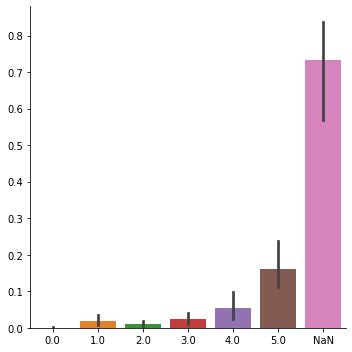

In [22]:
sns.catplot(data=sat_v_rating,kind='bar')

In [23]:
#patient vs clinician ratings
pat_v_clin_rating = pd.crosstab(survey_data['source'].fillna('NaN'), survey_data['rating'].fillna('NaN'), \
                        margins=True, margins_name='Total', normalize='index')
pat_v_clin_rating

rating,0.0,1.0,2.0,3.0,4.0,5.0,NaN
source,,,,,,,
Clinician,0.001830,0.013717,0.006468,0.013504,0.026015,0.049520,0.888946
Patient,0.000000,0.012286,0.006214,0.018029,0.045893,0.197455,0.720123
Total,0.000797,0.012909,0.006325,0.016059,0.037238,0.133041,0.793632


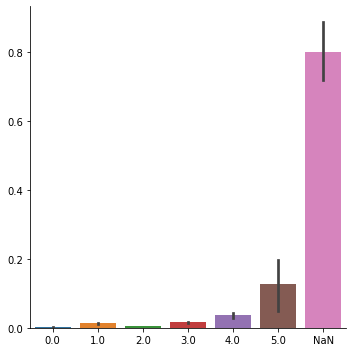

In [24]:
sns.catplot(data=pat_v_clin_rating,kind='bar')

In [25]:
#patient vs clinician satisfaction
pat_vs_clin_satisfaction = pd.crosstab(survey_data['source'].fillna('NaN'), survey_data['is_satisfied'].fillna('NaN'), \
                        margins=True, margins_name='Total', normalize='index')
pat_vs_clin_satisfaction

is_satisfied,0,1
source,,
Clinician,0.257557,0.742443
Patient,0.092815,0.907185
Total,0.164547,0.835453


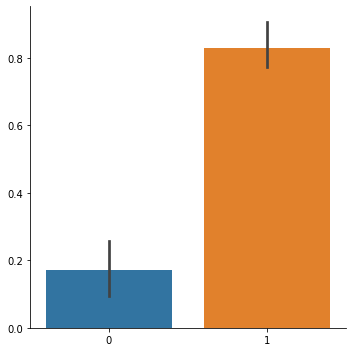

In [26]:
sns.catplot(data=pat_vs_clin_satisfaction,kind='bar')

In [27]:
#mobile vs desktop - satisfaction
mobile_v_desktop = pd.crosstab(survey_data['platform'].fillna('NaN'), survey_data['is_satisfied'].fillna('NaN'), \
                        margins=True, margins_name='Total', normalize='index')
mobile_v_desktop

is_satisfied,0,1
platform,,
,0.000045,0.999955
ALCATEL 5046G,0.000000,1.000000
ALCATEL A574BL,0.000000,1.000000
ANS L51,0.000000,1.000000
Acer B3-A30,0.000000,1.000000
Alcatel 5041C,0.000000,1.000000
Alcatel 5059S,0.000000,1.000000
Alcatel A502DL,0.000000,1.000000
Alcatel Alcatel_5008R,0.000000,1.000000


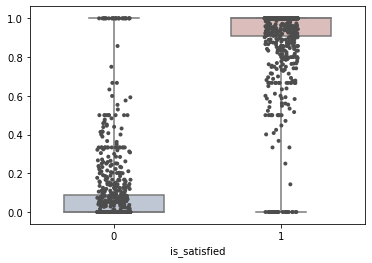

In [28]:
sns.boxplot(data=mobile_v_desktop,
            whis=[0, 100], width=.6, palette="vlag")
sns.stripplot(data=mobile_v_desktop,
              size=4, color=".3", linewidth=0)

In [29]:
#mobile platforms
pd.options.display.max_rows = 4000
only_mobile = survey_data[survey_data['is_mobile'] == 1]
platform = pd.crosstab(only_mobile['platform'].fillna('NaN'), only_mobile['is_mobile'].fillna('NaN'), \
                        normalize='all')
platform = pd.DataFrame(platform).reset_index()
new_mobile_df = platform.rename(columns={1: 'percentage'})
new_mobile_df
#new_df.nlargest(5, 'percentage', keep='all')

is_mobile,platform,percentage
0,,0.184895
1,ALCATEL 5046G,0.000008
2,ALCATEL A574BL,0.000025
3,ANS L51,0.000017
4,Acer B3-A30,0.000008
5,Alcatel 5041C,0.000008
6,Alcatel 5059S,0.000008
7,Alcatel A502DL,0.000017
8,Alcatel Alcatel_5008R,0.000017
9,Alcatel Alcatel_5059R,0.000008


In [30]:
desktop_platforms = pd.Series([item for item in survey_data['platform'].str.findall('^W\w*\s\w*|^M\w*\s\w*|^L[i,e]\w*\s\w*')])
desktop_platforms = desktop_platforms.dropna().str[0].head(2000)
desktop_platforms

228         Mac OS
229            NaN
230         Mac OS
231         Mac OS
232         Mac OS
233         Mac OS
234         Mac OS
235            NaN
236            NaN
237         Mac OS
238            NaN
239         Mac OS
240         Mac OS
241            NaN
242     Windows 10
243     Windows 10
244     Windows 10
245     Windows 10
246     Windows 10
247     Windows 10
248     Windows 10
249            NaN
250            NaN
251      Windows 7
252     Windows 10
253         Mac OS
254            NaN
255            NaN
256     Windows 10
257     Windows 10
258            NaN
259         Mac OS
260         Mac OS
261         Mac OS
262         Mac OS
263     Windows 10
264            NaN
265     Windows 10
266      Windows 7
267     Windows 10
268         Mac OS
269      Windows 7
270            NaN
271            NaN
272            NaN
273            NaN
274     Windows 10
275            NaN
276            NaN
277            NaN
278            NaN
279            NaN
280         

In [31]:
#desktop platforms
desktops = survey_data[survey_data['is_mobile'] == 0]
only_mobile = survey_data[survey_data['is_mobile'] == 1]
platform = pd.crosstab(desktop_platforms.fillna('NaN'), only_mobile['is_mobile'].fillna('NaN'), \
                        normalize='all')
platform = pd.DataFrame(platform).reset_index()
new_desktop_df = platform.rename(columns={0: 'percentage'})
new_desktop_df
#new_df.nlargest(5, 'percentage', keep='all')

is_mobile,row_0,1
0,NaN,1.0


In [32]:
#mobile vs desktop platforms - needs to output both desktop and mobile platforms
platform = pd.crosstab(survey_data['platform'].fillna('NaN'), survey_data['is_mobile'].fillna('NaN'), \
                        margins=True, margins_name='Total', normalize='all')
platform

is_mobile,0,1,Total
platform,,,
,0.000000,0.135932,0.135932
ALCATEL 5046G,0.000000,0.000006,0.000006
ALCATEL A574BL,0.000000,0.000019,0.000019
ANS L51,0.000000,0.000012,0.000012
Acer B3-A30,0.000000,0.000006,0.000006
Alcatel 5041C,0.000000,0.000006,0.000006
Alcatel 5059S,0.000000,0.000006,0.000006
Alcatel A502DL,0.000000,0.000012,0.000012
Alcatel Alcatel_5008R,0.000000,0.000012,0.000012


In [33]:
#avg satisfaction per month
survey_data['created_on'] = pd.to_datetime(survey_data['created_on'], format='%Y-%m-%d %H:%M:%S.%f')
survey_data['created_on_date'] = survey_data['created_on'].dt.date
survey_data['months'] = pd.to_datetime(survey_data['created_on'], format='%Y-%m-%d %H:%M:%S.%f').dt.strftime('%Y-%m')
avg_satisfaction = pd.crosstab(survey_data['months'], survey_data['source'], values = survey_data['is_satisfied'], \
                        margins=True, margins_name='Total', normalize='index', aggfunc = 'mean')
avg_satisfaction

source,Clinician,Patient
months,,
2019-03,0.476190,0.523810
2019-04,0.450431,0.549569
2019-05,0.390863,0.609137
2019-06,0.494087,0.505913
2019-07,0.452117,0.547883
2019-08,0.431818,0.568182
2019-09,0.500678,0.499322
2019-10,0.471698,0.528302
2019-11,0.477257,0.522743


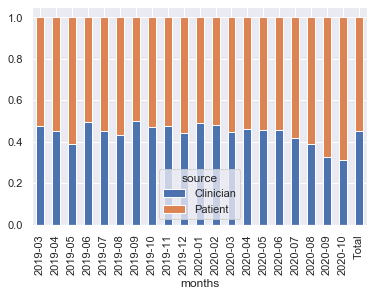

In [34]:
sns.set()
avg_satisfaction.plot(kind='bar', stacked=True)

In [35]:
#avg rating per month
survey_data['created_on'] = pd.to_datetime(survey_data['created_on'], format='%Y-%m-%d %H:%M:%S.%f')
survey_data['created_on_date'] = survey_data['created_on'].dt.date
survey_data['months'] = pd.to_datetime(survey_data['created_on'], format='%Y-%m-%d %H:%M:%S.%f').dt.strftime('%Y-%m')
avg_rating = pd.crosstab(survey_data['months'], survey_data['source'], values = survey_data['rating'], \
                        margins=True, margins_name='Total', normalize='index', aggfunc='mean')
avg_rating

source,Clinician,Patient
months,,
2020-07,0.457465,0.542535
2020-08,0.451533,0.548467
2020-09,0.460251,0.539749
2020-10,0.467880,0.532120
Total,0.457892,0.542108


In [36]:
survey_data['platform'].unique()

array([nan, 'Mac OS X 10_14_5', ' ', 'Mac OS X 10_13_5',
       'Mac OS X 10_12_6', 'Mac OS X 10.14', 'Mac OS X 10_13_6',
       'Windows 10', 'Windows 7', 'Mac OS X 10_14_2', 'Mac OS X 10_11_6',
       'Apple iPhone10,3', 'Apple iPhone8,1', 'vivo vivo 1601',
       'LGE LG-H818', 'LENOVO Lenovo TAB 2 A8-50LC', 'Apple iPad4,4',
       'Apple iPad6,11', 'samsung SM-G610F', 'Apple iPad7,5',
       'Apple iPad7,3', 'Apple iPad5,1', 'samsung SM-G965U',
       'Mac OS X 10_14_0', 'Apple iPhone9,4', 'Apple iPhone11,6',
       'Apple iPhone9,1', 'Apple iPhone11,8', 'Apple iPhone9,2',
       'Apple iPhone10,5', 'Google Android SDK built for x86',
       'Mac OS X 10_9_5', 'Apple iPhone11,2', 'Mac OS X 10_14_6',
       'Apple iPhone7,2', 'Apple iPhone10,1', 'Apple iPhone6,1',
       'Apple iPhone10,4', 'Apple iPhone7,1', 'LGE LM-Q710.FG',
       'Apple iPad7,4', 'Apple iPhone9,3', 'samsung SM-S767VL',
       'samsung SM-T820', 'Google Pixel 3', 'Apple iPhone10,2',
       'Mac OS X 10_14_3', 'sa

In [37]:
mobile_platforms = pd.Series([item for item in survey_data['platform']\
                              .str.findall('^Apple iP\w*|^samsung\sSM-\w*|^Google\s[a-zA-Z]\w*\s\w\s\w*|^LGE\s\w*|^HTC\s\w*|^asus\s\w*|^motorola\s\w')])
mobile_platforms = mobile_platforms.str[0].dropna()
mobile_platforms

276       Apple iPhone10
277        Apple iPhone8
278        Apple iPhone8
282               LGE LG
283        Apple iPhone8
               ...      
158964    Apple iPhone12
159410       Apple iPad7
159424       Apple iPad7
160996       Apple iPad7
161192       Apple iPad7
Length: 95804, dtype: object

In [38]:
#apple
apple_ = pd.Series([item for item in survey_data['platform']\
                    .str.findall('^Apple iP\w*')])
apple_platforms = apple_.str[0].dropna().head(3000)
apple_platforms

276     Apple iPhone10
277      Apple iPhone8
278      Apple iPhone8
283      Apple iPhone8
284      Apple iPhone8
286      Apple iPhone8
287        Apple iPad4
288      Apple iPhone8
289        Apple iPad6
290      Apple iPhone8
292        Apple iPad7
294        Apple iPad7
296        Apple iPad7
300        Apple iPad5
301        Apple iPad6
310        Apple iPad7
314      Apple iPhone9
315     Apple iPhone11
318        Apple iPad7
320      Apple iPhone9
322      Apple iPhone8
326     Apple iPhone11
328      Apple iPhone9
329      Apple iPhone9
330     Apple iPhone10
348     Apple iPhone10
350     Apple iPhone11
358      Apple iPhone7
359        Apple iPad7
364     Apple iPhone11
370     Apple iPhone10
371      Apple iPhone6
374      Apple iPhone9
376      Apple iPhone9
378     Apple iPhone10
386     Apple iPhone10
387        Apple iPad7
391     Apple iPhone11
393      Apple iPhone7
398        Apple iPad7
401     Apple iPhone11
403      Apple iPhone9
404      Apple iPhone9
405      Ap

In [39]:
apple_platforms

276     Apple iPhone10
277      Apple iPhone8
278      Apple iPhone8
283      Apple iPhone8
284      Apple iPhone8
286      Apple iPhone8
287        Apple iPad4
288      Apple iPhone8
289        Apple iPad6
290      Apple iPhone8
292        Apple iPad7
294        Apple iPad7
296        Apple iPad7
300        Apple iPad5
301        Apple iPad6
310        Apple iPad7
314      Apple iPhone9
315     Apple iPhone11
318        Apple iPad7
320      Apple iPhone9
322      Apple iPhone8
326     Apple iPhone11
328      Apple iPhone9
329      Apple iPhone9
330     Apple iPhone10
348     Apple iPhone10
350     Apple iPhone11
358      Apple iPhone7
359        Apple iPad7
364     Apple iPhone11
370     Apple iPhone10
371      Apple iPhone6
374      Apple iPhone9
376      Apple iPhone9
378     Apple iPhone10
386     Apple iPhone10
387        Apple iPad7
391     Apple iPhone11
393      Apple iPhone7
398        Apple iPad7
401     Apple iPhone11
403      Apple iPhone9
404      Apple iPhone9
405      Ap

In [40]:
dimensions = survey_data['screen_size'].str.split('x').dropna().head(1000)
ss1 = dimensions.apply(lambda x:x[0]).astype(int)
ss2 = dimensions.apply(lambda x:x[1]).astype(int)
total_res = ss1 * ss2

In [41]:
def classify_device_type(row):
    platform = row['platform']
    tot_res = row['total_resolution']
    
    if bool(re.match('Apple iP\w*', platform)) == True and tot_res >= 1425636.0:
        row['device_type'] = 'Tablet'
    else:
        row['device_type'] = np.where(tot_res < 547800.0, 'Phone',\
                                            np.where(tot_res > 927408.0, 'Desktop', 'Tablet'))
    return row

In [42]:
def classify_mobile_type(row):
    platform = row['platform']
    
    if row['is_mobile'] == 1:
        if bool(re.match('Apple iP\w*', platform)) == True:
            row['mobile_type'] = 'iOS'
        else:
            row['mobile_type'] = 'Android'
    else:
        row['mobile_type'] = 'NA'
    
    return row

#change returns

In [43]:
#resolution by device type
displays_df = pd.DataFrame\
({'id': survey_data['id'], 'platform': survey_data['platform'],\
  'screen_size': survey_data['screen_size'],'ss1':ss1,'ss2':ss2, 'total_resolution': total_res, \
  'build_version': survey_data['build_version'],\
  'client_name': survey_data['client_name'], 'is_satisfied': survey_data['is_satisfied'], \
  'is_mobile': survey_data['is_mobile'], 'feedback': survey_data['feedback'], \
  'n_minute_duration': survey_data['n_minute_duration']}).dropna()
displays_df['rating'] = survey_data['rating']
displays_df

,id,platform,screen_size,ss1,ss2,total_resolution,build_version,client_name,is_satisfied,is_mobile,feedback,n_minute_duration,rating
276,277,"Apple iPhone10,3",375 x 812,375.0,812.0,304500.0,3.9,iPhone (3),1,1,experience was good,7.4333,NaN
277,278,"Apple iPhone8,1",375 x 375,375.0,375.0,140625.0,3.8,Lalu’s Phone,1,1,nice experience,7.4333,NaN
278,279,"Apple iPhone8,1",375 x 667,375.0,667.0,250125.0,3.9,Lalu’s Phone,1,1,nice calling,7.4333,NaN
280,281,vivo vivo 1601,360 x 640,360.0,640.0,230400.0,7.8,vivo 1601,1,1,nice,2.0333,NaN
281,282,vivo vivo 1601,360 x 640,360.0,640.0,230400.0,7.8,vivo 1601,1,1,good,2.0333,NaN
282,283,LGE LG-H818,360 x 598,360.0,598.0,215280.0,7.8,LG-H818,1,1,nice experience on android,2.0333,NaN
284,285,"Apple iPhone8,1",375 x 375,375.0,375.0,140625.0,3.8,Lalu’s Phone,1,1,nice,2.0333,NaN
285,286,LENOVO Lenovo TAB 2 A8-50LC,600 x 913,600.0,913.0,547800.0,7.8,Lenovo TAB 2 A8-50LC,1,1,nice,0.0000,NaN
286,287,"Apple iPhone8,1",375 x 375,375.0,375.0,140625.0,3.8,Lalu’s Phone,1,1,nice,0.0000,NaN
287,288,"Apple iPad4,4",768 x 1024,768.0,1024.0,786432.0,3.9,ios’s iPad,1,1,nice on ipad,0.0000,NaN


In [44]:
classify_mobile_type(displays_df.loc[277])

D:\New folder\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\New folder\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


id                               278
platform             Apple iPhone8,1
screen_size                375 x 375
ss1                              375
ss2                              375
total_resolution              140625
build_version                    3.8
client_name             Lalu’s Phone
is_satisfied                       1
is_mobile                          1
feedback             nice experience
n_minute_duration             7.4333
rating                           NaN
mobile_type                      iOS
Name: 277, dtype: object

In [45]:
devices = pd.DataFrame(displays_df.apply(lambda row: classify_device_type(row), axis=1))
devices = devices.apply(lambda row: classify_mobile_type(row), axis=1)
devices

,id,platform,screen_size,ss1,ss2,total_resolution,build_version,client_name,is_satisfied,is_mobile,feedback,n_minute_duration,rating,device_type,mobile_type
276,277,"Apple iPhone10,3",375 x 812,375.0,812.0,304500.0,3.9,iPhone (3),1,1,experience was good,7.4333,NaN,Phone,iOS
277,278,"Apple iPhone8,1",375 x 375,375.0,375.0,140625.0,3.8,Lalu’s Phone,1,1,nice experience,7.4333,NaN,Phone,iOS
278,279,"Apple iPhone8,1",375 x 667,375.0,667.0,250125.0,3.9,Lalu’s Phone,1,1,nice calling,7.4333,NaN,Phone,iOS
280,281,vivo vivo 1601,360 x 640,360.0,640.0,230400.0,7.8,vivo 1601,1,1,nice,2.0333,NaN,Phone,Android
281,282,vivo vivo 1601,360 x 640,360.0,640.0,230400.0,7.8,vivo 1601,1,1,good,2.0333,NaN,Phone,Android
282,283,LGE LG-H818,360 x 598,360.0,598.0,215280.0,7.8,LG-H818,1,1,nice experience on android,2.0333,NaN,Phone,Android
284,285,"Apple iPhone8,1",375 x 375,375.0,375.0,140625.0,3.8,Lalu’s Phone,1,1,nice,2.0333,NaN,Phone,iOS
285,286,LENOVO Lenovo TAB 2 A8-50LC,600 x 913,600.0,913.0,547800.0,7.8,Lenovo TAB 2 A8-50LC,1,1,nice,0.0000,NaN,Tablet,Android
286,287,"Apple iPhone8,1",375 x 375,375.0,375.0,140625.0,3.8,Lalu’s Phone,1,1,nice,0.0000,NaN,Phone,iOS
287,288,"Apple iPad4,4",768 x 1024,768.0,1024.0,786432.0,3.9,ios’s iPad,1,1,nice on ipad,0.0000,NaN,Tablet,iOS


In [46]:
#Desktop: Chrome v. Firefox
desktops_only = pd.DataFrame(devices[devices['device_type'] == 'Desktop']).reset_index()

desktop_client_prop = pd.crosstab(desktops_only['platform'], desktops_only['is_satisfied'], \
                        margins=True, margins_name='Total', normalize='index')
desktop_client_prop

is_satisfied,0,1
platform,,
"Apple iPad7,11",0.500000,0.500000
"Apple iPad7,12",0.000000,1.000000
Total,0.333333,0.666667


In [47]:
#iOS v. Android v. Desktop
mobile_only = pd.DataFrame(devices[devices['is_mobile'] == 1]).reset_index()

mobile_client_prop = pd.crosstab(mobile_only['mobile_type'], mobile_only['is_satisfied'], \
                        margins=True, margins_name='Total', normalize='all')
mobile_client_prop

is_satisfied,0,1,Total
mobile_type,,,
Android,0.019417,0.116505,0.135922
iOS,0.271845,0.592233,0.864078
Total,0.291262,0.708738,1.000000


In [48]:
#visit duration v feedback (is satisfied), call describe() to look at distributions - data.groupby('is_satisfied')['n_minute_duration'].describe()
#data.groupby('rating')['n_minute_duration'].describe()
#try to figure out short, medium, and long durations - define the thresholds - by feedback given(based off rating and is_satisfied) and by duration


In [49]:
devices['n_minute_duration'].describe()

count    103.000000
mean      14.392391
std       15.651898
min        0.000000
25%        3.875000
50%        9.316700
75%       18.800000
max       71.183300
Name: n_minute_duration, dtype: float64

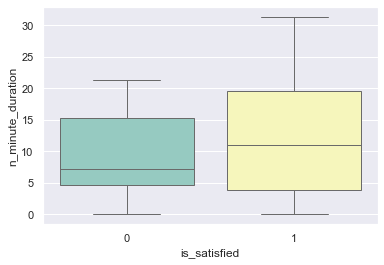

In [50]:
ax = sns.boxplot(x=devices['is_satisfied'], y=devices['n_minute_duration'], palette='Set3', linewidth=1, showfliers=False)
#ax = sns.swarmplot(x=devices['is_satisfied'], y=devices['n_minute_duration'], color=".25")
#run value_counts on is_satisfied

In [51]:
devices['n_minute_duration'].describe(include='all').loc['25%']

3.875

In [52]:
SHORT, MEDIUM, LONG = devices['n_minute_duration'].describe(include='all').loc[['25%', '50%', '75%']]

In [53]:
def duration_intervals(row):
    duration = row['n_minute_duration']
    if duration <= SHORT:
        return 'short'
    elif duration <= MEDIUM:
        return 'medium'
    else:
        return 'large'

#return columns, not entire row

In [54]:
duration_intervals(devices.loc[276])

'medium'

In [55]:
SHORT, MEDIUM, LONG = devices['n_minute_duration'].describe(include='all').loc[['25%', '50%', '75%']]
print([SHORT, MEDIUM, LONG])

[3.875, 9.3167, 18.8]


In [56]:
#create a new column in df, devices['duration_interval'] = 
devices['duration_type'] = devices.apply(lambda row: duration_intervals(row), axis=1)
devices

,id,platform,screen_size,ss1,ss2,total_resolution,build_version,client_name,is_satisfied,is_mobile,feedback,n_minute_duration,rating,device_type,mobile_type,duration_type
276,277,"Apple iPhone10,3",375 x 812,375.0,812.0,304500.0,3.9,iPhone (3),1,1,experience was good,7.4333,NaN,Phone,iOS,medium
277,278,"Apple iPhone8,1",375 x 375,375.0,375.0,140625.0,3.8,Lalu’s Phone,1,1,nice experience,7.4333,NaN,Phone,iOS,medium
278,279,"Apple iPhone8,1",375 x 667,375.0,667.0,250125.0,3.9,Lalu’s Phone,1,1,nice calling,7.4333,NaN,Phone,iOS,medium
280,281,vivo vivo 1601,360 x 640,360.0,640.0,230400.0,7.8,vivo 1601,1,1,nice,2.0333,NaN,Phone,Android,short
281,282,vivo vivo 1601,360 x 640,360.0,640.0,230400.0,7.8,vivo 1601,1,1,good,2.0333,NaN,Phone,Android,short
282,283,LGE LG-H818,360 x 598,360.0,598.0,215280.0,7.8,LG-H818,1,1,nice experience on android,2.0333,NaN,Phone,Android,short
284,285,"Apple iPhone8,1",375 x 375,375.0,375.0,140625.0,3.8,Lalu’s Phone,1,1,nice,2.0333,NaN,Phone,iOS,short
285,286,LENOVO Lenovo TAB 2 A8-50LC,600 x 913,600.0,913.0,547800.0,7.8,Lenovo TAB 2 A8-50LC,1,1,nice,0.0000,NaN,Tablet,Android,short
286,287,"Apple iPhone8,1",375 x 375,375.0,375.0,140625.0,3.8,Lalu’s Phone,1,1,nice,0.0000,NaN,Phone,iOS,short
287,288,"Apple iPad4,4",768 x 1024,768.0,1024.0,786432.0,3.9,ios’s iPad,1,1,nice on ipad,0.0000,NaN,Tablet,iOS,short


In [57]:
satisfied_devices = devices[devices['is_satisfied'] == 1]
build_version_3 = devices[devices['build_version'] < 4.0]
build_version_3

,id,platform,screen_size,ss1,ss2,total_resolution,build_version,client_name,is_satisfied,is_mobile,feedback,n_minute_duration,rating,device_type,mobile_type,duration_type
276,277,"Apple iPhone10,3",375 x 812,375.0,812.0,304500.0,3.9,iPhone (3),1,1,experience was good,7.4333,NaN,Phone,iOS,medium
277,278,"Apple iPhone8,1",375 x 375,375.0,375.0,140625.0,3.8,Lalu’s Phone,1,1,nice experience,7.4333,NaN,Phone,iOS,medium
278,279,"Apple iPhone8,1",375 x 667,375.0,667.0,250125.0,3.9,Lalu’s Phone,1,1,nice calling,7.4333,NaN,Phone,iOS,medium
284,285,"Apple iPhone8,1",375 x 375,375.0,375.0,140625.0,3.8,Lalu’s Phone,1,1,nice,2.0333,NaN,Phone,iOS,short
286,287,"Apple iPhone8,1",375 x 375,375.0,375.0,140625.0,3.8,Lalu’s Phone,1,1,nice,0.0000,NaN,Phone,iOS,short
287,288,"Apple iPad4,4",768 x 1024,768.0,1024.0,786432.0,3.9,ios’s iPad,1,1,nice on ipad,0.0000,NaN,Tablet,iOS,short
288,289,"Apple iPhone8,1",375 x 375,375.0,375.0,140625.0,3.8,Lalu’s Phone,1,1,nice,0.0000,NaN,Phone,iOS,short
289,290,"Apple iPad6,11",768 x 1024,768.0,1024.0,786432.0,3.9,Lalit’s iPad,1,1,good video,0.0000,NaN,Tablet,iOS,short
290,291,"Apple iPhone8,1",375 x 375,375.0,375.0,140625.0,3.8,Lalu’s Phone,1,1,nice,0.0000,NaN,Phone,iOS,short
292,293,"Apple iPad7,5",768 x 1024,768.0,1024.0,786432.0,3.9,Connor’s iPad,1,1,Thank you,31.3500,NaN,Tablet,iOS,large


In [58]:
#feedback NLP
def remove_punctuation(text):
    no_punct = ''.join([c for c in text if c not in string.punctuation])
    return no_punct

In [59]:
#general wordcloud
devices['feedback'] = devices['feedback'].apply(lambda x: remove_punctuation(x))
devices_feedback = devices['feedback'].astype('string')

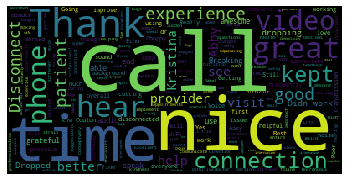

In [60]:
wordcloud = WordCloud().generate(' '.join(devices_feedback))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [61]:
#satisfied wordcloud
satisfied_devices['feedback'] = satisfied_devices['feedback'].apply(lambda x: remove_punctuation(x))
feedback_satisfied = satisfied_devices['feedback'].astype('string')

D:\New folder\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


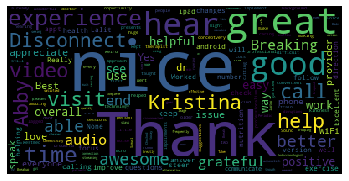

In [62]:
wordcloud = WordCloud().generate(' '.join(feedback_satisfied))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [63]:
#build_version wordcloud
build_version_3['feedback'] = build_version_3['feedback'].apply(lambda x: remove_punctuation(x))
feedback_2 = build_version_3['feedback'].astype('string')

D:\New folder\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


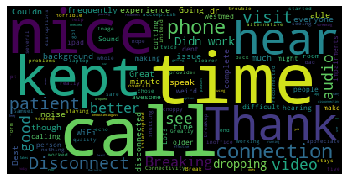

In [64]:
wordcloud = WordCloud().generate(' '.join(feedback_2))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [65]:
#value_count most common words, decide which words are insight vs not
#figure out single concepts from feedback - then start looking at 2 to 3 word comments
#compile useful words, drop words like nice, good - paste into google sheets to decide usefulness
#look at stopwords - see how to include some useful words


devices['feedback'].value_counts()

nice                                                                                                                                                                                                                                                                                                                          6
Didn’t work again                                                                                                                                                                                                                                                                                                             3
nice experience                                                                                                                                                                                                                                                                                                               2
Disconnect                              

In [66]:
#feedback_list = devices['feedback'].tolist()
#word_list = [word for item_list in feedback_list for word in item_list]
#word_list = pd.Series(word_list)
#print(word_list.value_counts())

In [67]:
devices['feedback']

276                                   experience was good
277                                       nice experience
278                                          nice calling
280                                                 nice 
281                                                  good
282                           nice experience  on android
284                                                  nice
285                                                  nice
286                                                  nice
287                                          nice on ipad
288                                                  nice
289                                            good video
290                                                  nice
291                                       nice experience
292                                             Thank you
300                                                  nice
322                        Lalit check for version number
329           

In [101]:
#number of disconnections, join survey_data on visit_id and participant_type
#survey data left join participant visit on survey_data.visit_id = participant_visit.visit_id AND 
#survey_data.participant_type = participant_visit.participant_type
#top 10 satisfied feedback, unsatisfied feedback - percentages of occurences - define categories of issues, row by row write a function that takes in feedback -> output the category of problem

#phase 1 - define functions that will classify feedback text - audio, video, connection issues (product, experience) 
#phase 2 - define methods to classify categories through what the data tells us(N-grams, value_counts)

In [102]:
participant_data = pd.read_csv(r'G:\Shared drives\MediSprout\vishaal\MediSprout-notebooks\NLP Analysis\v2md_v2_1_participant_visit.csv')
participant_data

D:\New folder\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,visit_id,participant_uuid,participant_type,created_on,updated_on,provider_id,patient_id,user_id,room_entered_at,room_exited_at,duration,on_call,numb_times_connected,video_device,wait_time
0,7367,16001,df93c824-ac12-4175-bf38-1c8fbba7c236,Pt,2018-03-06 15:59:09,2018-03-06 15:59:09,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,0
1,7368,16002,f2f179ab-b711-44f6-8871-285c40770bca,Pt,2018-03-06 16:02:12,2018-03-06 16:02:12,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,0
2,7369,16003,c6eed1e6-185d-4602-947b-cf82f9fcf8bf,Pt,2018-03-06 16:04:03,2018-03-06 16:04:03,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,0
3,7370,16004,ZqIjSqbB0,Pt,2018-03-07 06:07:33,2018-03-07 06:07:33,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,0
4,7371,16005,a16a3edf,Pt,2018-03-07 13:37:33,2018-03-07 13:37:33,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486319,493786,269712,rXFyTyyJGb8nPQmGtEX2ilBzT9K7BJ7X4HDbcdSh4eFwv,Pt,2020-10-07 23:06:19,2020-10-07 23:06:19,NaN,276024.0,NaN,2020-10-07 23:06:19,2020-10-07 23:19:45,806,0,1,ANDROID,838
486320,493787,269714,hFaU8cvnPl0Lo5rIrJA3jJBLb8lqc3hN71gpUSlTiNktB,Dr,2020-10-07 23:16:29,2020-10-07 23:16:29,67569.0,102745.0,NaN,2020-10-07 23:16:28,2020-10-08 00:17:53,3685,0,1,IOS,88
486321,493788,269714,dQI3EEOWZFDJwQWMJnixqPpBsJYjk1dOQhkfLP7gxOdoC,Pt,2020-10-07 23:16:37,2020-10-07 23:16:37,NaN,102745.0,NaN,2020-10-07 23:16:36,2020-10-08 00:17:50,3673,0,1,CHROME,26
486322,493789,269715,8qbnegBhz9Z8d7hgPXUgOafyBZ8WRUVb7jtlAg77CYTZF,Dr,2020-10-08 00:30:50,2020-10-08 00:30:50,68742.0,265217.0,NaN,2020-10-08 00:30:49,NaN,0,1,1,CHROME,49


In [103]:
participant_survey = survey_data.merge(participant_data, on='visit_id', how='left')

In [104]:
#disconnections v rating - build a histogram of value counts
discon_rating = pd.crosstab(participant_survey['numb_times_connected'], participant_survey['rating'], \
                           margins=True, margins_name='Total', normalize='index')
discon_rating

rating,0.0,1.0,2.0,3.0,4.0,5.0
numb_times_connected,,,,,,
0.0,0.000097,0.092780,0.044449,0.095497,0.233987,0.533191
1.0,0.004345,0.027092,0.021187,0.071129,0.175441,0.700807
2.0,0.003312,0.157231,0.060716,0.089260,0.157073,0.532408
3.0,0.007713,0.256198,0.063361,0.115702,0.138843,0.418182
4.0,0.010340,0.262925,0.078287,0.103397,0.172821,0.372230
5.0,0.006897,0.400000,0.086207,0.110345,0.093103,0.303448
6.0,0.000000,0.369231,0.092308,0.092308,0.107692,0.338462
7.0,0.030769,0.369231,0.123077,0.046154,0.153846,0.276923
8.0,0.000000,0.343284,0.149254,0.044776,0.164179,0.298507


In [105]:
#disconnections v satisfaction

In [106]:
discon_satisfaction = pd.crosstab(participant_survey['numb_times_connected'], participant_survey['is_satisfied'], \
                           margins=True, margins_name='Total', normalize='index')
discon_satisfaction

is_satisfied,0,1
numb_times_connected,,
0.0,0.149192,0.850808
1.0,0.232448,0.767552
2.0,0.242284,0.757716
3.0,0.263603,0.736397
4.0,0.237171,0.762829
5.0,0.289308,0.710692
6.0,0.256757,0.743243
7.0,0.253333,0.746667
8.0,0.342857,0.657143


Text(0, 0.5, 'percentage satisfied/unsatisfied')

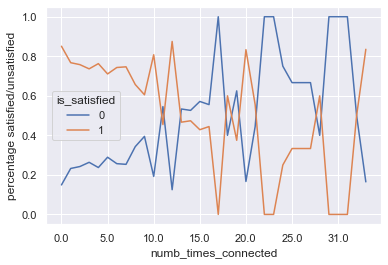

In [107]:
sns.set()
discon_satisfaction.plot().set_ylabel('percentage satisfied/unsatisfied')

In [108]:
#feedback by platform
devices.groupby('platform')['feedback'].value_counts().to_frame()

feedback
platform                    feedback                                                    
Apple iPad11,1              Image quality could be clearer                             1
Apple iPad4,4               nice on ipad                                               1
Apple iPad5,1               nice                                                       1
Apple iPad6,11              good video                                                 1
Apple iPad7,11              Phone call kept dropping  Had to call pt back f...         1
                            Phone calls keep pausing  Takes a few minutes t...         1
                            There were disruptions but overall we accomplis...         1
Apple iPad7,12              Lots of background noise could hear other peopl...         1
                            Sound kept cutting out otherwise good visit                1
Apple iPad7,3               Excellent way to communicate                               1
Apple iPad7,4               Horrendous feedback during the entire call                 1
Apple iPad7,5               Kristina is a huge help and I’m very grateful f...         1
                            Kristina is an amazing therapist I appreciate h...         1
                            Kristina is professional kind presents suggesti...         1
                            Kristina is wonderful I’m very grateful for wha...         1
                            Thank you                                                  1
                            Very helpful                                               1
Apple iPhone10,1            Great                                                      1
                            Had trouble staying on  Kept shutting off                  1
                            It started fine and worked for about a minute T...         1
                            Kept disconnecting                                         1
                            Only can do on phone Not laptop                            1
                            Very good                                                  1
                            Very satisfied                                             1
Apple iPhone10,2            Some times the audio is weird but I was able to...         1
                            The transmission was terrible and constantly sa...         1
                            Worked great                                               1
                            Yes we love DrGuerra he is great and my son lov...         1
Apple iPhone10,3             experience was good                                       1
                            Disconnected form phone several times                      1
                            So much background noise I couldn’t hear patient           1
                            We could not hear each other and the connection...         1
Apple iPhone10,4            Call got disconnected frequently                           1
Apple iPhone10,5            Echo from providers end                                    1
Apple iPhone10,6            Calls keep dropping Help                                   1
                            Dropped                                                    1
                            Dropped call                                               1
                            Dropped x5 in 15 min                                       1
                            Great                                                      1
                            Great to see and speak with my provider The bes...         1
Apple iPhone11,2            Didn’t work again                                          3
                            Connectivity issues                                        1
                            Couldn’t see the patient though he could see me...         1
                            His voice went in and out so I did have to stra

In [109]:
#feedback by build version
devices.groupby('build_version')['feedback'].value_counts().to_frame()

feedback
build_version feedback                                                    
1.0           Didn’t work again                                          3
              Breaking up                                                2
              Disconnect                                                 2
              Best visit ever                                            1
              Break up                                                   1
              Breaking up audio on the patients end                      1
              Breakup                                                    1
              Call got disconnected frequently                           1
              Call kept dropping                                         1
              Call kept getting dropped                                  1
              Connection cut out at least 10 times                       1
              Connection interrupted frequently                          1
              Connection problems  Going in and out                      1
              Connectivity issues                                        1
              Couldn’t see the patient though he could see me...         1
              Disconnect                                                 1
              Disconnected form phone several times                      1
              Great                                                      1
              Great to see and speak with my provider The bes...         1
              Had trouble staying on  Kept shutting off                  1
              Image quality could be clearer                             1
              It started fine and worked for about a minute T...         1
              It’s really bad                                            1
              Kept disconnecting                                         1
              Lots of background noise could hear other peopl...         1
              Not working                                                1
              Only can do on phone Not laptop                            1
              Periodic disconnects but streaming was better t...         1
              Phone call kept dropping  Had to call pt back f...         1
              Phone calls keep pausing  Takes a few minutes t...         1
              Poor connection                                            1
              So much background noise I couldn’t hear patient           1
              Some times the audio is weird but I was able to...         1
              Thank you Westmed thank you dr dent This was aw...         1
              Thank you for everyone’s help                              1
              Thank you so much dr Samuel  Greatly appreciate...         1
              The patient could not hear me and also the vide...         1
              There were disruptions but overall we accomplis...         1
              We could not hear each other and the connection...         1
              very choppy connection but better than nothing ...         1
              video goes in and out she could not hear me eve...         1
              yes it was very effective and it was a pleasant...         1
1.2           Sound kept cutting out otherwise good visit                1
3.8           nice                                                       4
              nice experience                                            1
3.9            experience was good                                       1
              Thank you                                                  1
              good video                                                 1
              nice                                                       1
              nice calling                                               1
              nice on ipad                                               1
4.0           Lalit check for version number                             1
              No

In [110]:
#satisfaction percentage per build version
devices.groupby('build_version')['is_satisfied'].value_counts(normalize=True).to_frame()

is_satisfied
build_version is_satisfied              
1.0           1                 0.586957
              0                 0.413043
1.2           1                 1.000000
3.8           1                 1.000000
3.9           1                 1.000000
4.0           1                 1.000000
4.1           0                 0.500000
              1                 0.500000
4.3           1                 1.000000
4.4           1                 0.875000
              0                 0.125000
4.5           1                 0.666667
              0                 0.333333
4.6           1                 1.000000
4.7           1                 0.625000
              0                 0.375000
7.8           1                 1.000000
8.2           0                 0.500000
              1                 0.500000
8.4           1                 1.000000
9.2           1                 1.000000

In [111]:
#feedback by duration
devices.groupby('n_minute_duration')['feedback'].value_counts().to_frame()

feedback
n_minute_duration feedback                                                    
0.0000            nice                                                       4
                  Great                                                      1
                  Horrendous feedback during the entire call                 1
                  Squeaking during call\nGetting on the cal for p...         1
                  The transmission was terrible and constantly sa...         1
                  good video                                                 1
                  nice experience                                            1
                  nice on ipad                                               1
1.7333            It started fine and worked for about a minute T...         1
                  It’s really bad                                            1
                  Not working                                                1
1.8667            Best visit ever                                            1
                  Breaking up audio on the patients end                      1
2.0333            good                                                       1
                  nice                                                       1
                  nice                                                       1
                  nice experience  on android                                1
2.5167            Lalit check for version number                             1
2.6000            Break up                                                   1
                  Breakup                                                    1
3.1000            Didn’t work again                                          2
3.8167            A little garbled at times but I could hear the ...         1
3.9333            Yes we love DrGuerra he is great and my son lov...         1
4.1000            Great                                                      1
4.4500            His voice went in and out so I did have to stra...         1
4.6000            Kept disconnecting                                         1
4.7500            Choppy feed                                                1
5.4167            Dropped call                                               1
5.5000            Didn’t work again                                          1
5.6167            Connection problems  Going in and out                      1
6.0000            Breaking up                                                2
6.1500            Echo from providers end                                    1
6.2833            Couldn’t see the patient though he could see me...         1
6.4333            Call kept getting dropped                                  1
6.5833            very choppy connection but better than nothing ...         1
6.6000            Kristina is wonderful I’m very grateful for wha...         1
7.0167            Phone calls keep pausing  Takes a few minutes t...         1
7.3500            Very good                                                  1
7.4333             experience was good                                       1
                  nice calling                                               1
                  nice experience                                            1
7.7833            Thank you so much dr Samuel  Greatly appreciate...         1
7.9667            Phone call kept dropping  Had to call pt back f...         1
8.0500            Thank you for everyone’s help                              1
8.7167            Didn’t work                                                1
                  Still not working                                          1
9.3167            Lots of background noise could hear other peopl...         1
10.0667           Periodic disconnects but streaming was better t...         1
10.5167           nice                                                       1
10.5500           Disconnected form phone

In [112]:
devices['n_minute_duration'].describe()

count    103.000000
mean      14.392391
std       15.651898
min        0.000000
25%        3.875000
50%        9.316700
75%       18.800000
max       71.183300
Name: n_minute_duration, dtype: float64

In [113]:
devices.groupby(pd.cut(devices['n_minute_duration'], np.arange(0, 1.0+10, 10)))

In [125]:
bins = [0, 5, 10, 15, 20, 100]
groups = devices.groupby(['feedback', pd.cut(devices.n_minute_duration, bins)])
groups = groups.size().unstack()

In [126]:
total_row = groups.sum()

In [127]:
groups.append(total_row.transpose())

TypeError: Can only append a Series if ignore_index=True or if the Series has a name